## mecab 설치

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [543 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Ge

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.l

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  2921k      0 --:--:-- --:--:-- --:--:-- 2921k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

# **1. 데이터 및 라이브러리 불러오기**

In [ ]:
# konlpy 라이브러리 설치
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 86 kB 6.7 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import konlpy
from konlpy.tag import Okt
from konlpy.tag import Mecab

In [ ]:
import re, tqdm, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/train.csv')
test=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/test.csv')
sample_submission=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/sample_submission.csv')

# **2. 데이터 EDA**

- 데이터 확인

In [ ]:
train.head(2)

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
0,0,2016,농업기초기반연구,농촌진흥청,신규,농산물안전성연구,유전정보를 활용한 새로운 해충 분류군 동정기술 개발,○ 새로운 해충분류군의 동정기술 개발 및 유입확산 추적,(가) 외래 및 돌발해충의 발생조사 및 종 동정\n\n\n ○ 대상해충 : 최...,"○ 새로운 돌발 및 외래해충의 신속, 정확한 동정법 향상\n\n\n○ 돌발 및 외래...","뉴클레오티드 염기서열, 분자마커, 종 동정, 침샘, 전사체","nucleotide sequence, molecular marker, species...",24
1,1,2019,이공학학술연구기반구축(R&D),교육부,신규,지역대학우수과학자지원사업(1년~5년),대장암의 TRAIL 내성 표적 인자 발굴 및 TRAIL 반응 예측 유전자 지도 구축...,최종목표: TRAIL 감수성 표적 유전자를 발굴하고 내성제어 기전을 연구. 발굴된...,1차년도\n1) Microarray를 통한 선천적 TRAIL 내성 표적 후보 유전자...,"1) TRAIL 내성 특이적 표적분자를 발굴하고, 이를 이용한 TRAIL 효과 증진...","대장암,항암제 내성,세포사멸,유전자발굴","TRAIL,Colorectal cancer,TRAIL resistance,Apopt...",0


In [ ]:
test.head(2)

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드
0,174304,2016,경제협력권산업육성,산업통상자원부,신규,자동차융합부품,R-FSSW 기술 적용 경량 차체 부품 개발 및 품질 평가를 위한 64채널 C-SC...,○ 차체 점용접부의 품질 검사를 위한 64채널 무선 기반 C-Scan 탐촉자 개발\...,○ 1차년도\n\n . 개발 탐촉 시스템의 성능 평가 위한 표준 시편 제작 시...,○ 기술적 파급효과\n\n - 본 연구에서 개발된 R-FSSW 접합 기술은 기존 ...,"마찰교반점용접, 비파괴 검사, 초음파 탐상, 씨 스캔, 용접 품질 평가","Friction Stir Spot Welding, Non-destructive ev..."
1,174305,2018,개인기초연구(과기정통부)(R&D),과학기술정보통신부,계속,신진연구(총연구비5천이상~1.5억이하),다입자계를 묘사하는 편미분방정식에 대한 연구,자연계에는 입자의 개수가 아주 큰 다양한 다입자계가 존재한다. 이런 다입자계의 효...,연구과제1. 무한입자계의 동역학 / 작용소(operator) 방정식에 대한 연구\n...,본 연구는 물리학에서 중요한 대상인 다입자계를 묘사하는 모델방정식의 정당성을 보장하...,"다체계 방정식,동역학의 안정성,양자역학,고전역학,평균장 극한,고전극한,비상대론적 극한","many particle system,stability of dynamics,qua..."


In [ ]:
sample_submission.head()

,index,label
0,174304,0
1,174305,0
2,174306,0
3,174307,0
4,174308,0


- 칼럼 확인

In [ ]:
train.columns

Index(['index', '제출년도', '사업명', '사업_부처명', '계속과제여부', '내역사업명', '과제명', '요약문_연구목표',
       '요약문_연구내용', '요약문_기대효과', '요약문_한글키워드', '요약문_영문키워드', 'label'],
      dtype='object')

In [ ]:
test.columns

Index(['index', '제출년도', '사업명', '사업_부처명', '계속과제여부', '내역사업명', '과제명', '요약문_연구목표',
       '요약문_연구내용', '요약문_기대효과', '요약문_한글키워드', '요약문_영문키워드'],
      dtype='object')

- 결측치 확인

In [ ]:
# train 데이터 결측치 확인.
train.isna().sum()

index           0
제출년도            0
사업명             0
사업_부처명          0
계속과제여부          0
내역사업명           0
과제명             0
요약문_연구목표     3002
요약문_연구내용     3001
요약문_기대효과     3051
요약문_한글키워드    3028
요약문_영문키워드    3087
label           0
dtype: int64

In [ ]:
# test 데이터 결측치 확인.
test.isna().sum()

index          0
제출년도           0
사업명            0
사업_부처명         0
계속과제여부         0
내역사업명          0
과제명            0
요약문_연구목표     755
요약문_연구내용     755
요약문_기대효과     761
요약문_한글키워드    760
요약문_영문키워드    772
dtype: int64

- 데이터 구조 파악

In [ ]:
print("train 데이터 :", train.shape)
print("test 데이터 :", test.shape)
print("sample_submission 데이터 :", sample_submission.shape)
print("label이 0인 train 데이터 :", train[train["label"] == 0].shape)
print("label이 0이 아닌 train 데이터 :", train[train["label"] != 0].shape)

train 데이터 : (174304, 13)
test 데이터 : (43576, 12)
sample_submission 데이터 : (43576, 2)
label이 0인 train 데이터 : (142571, 13)
label이 0이 아닌 train 데이터 : (31733, 13)


In [ ]:
#train 데이터는 심각한 불균형 데이터임
train.label.value_counts(sort=False)/len(train)

0     0.817945
1     0.007234
2     0.001578
3     0.000820
4     0.000327
5     0.009742
6     0.000447
7     0.000648
8     0.001945
9     0.000608
10    0.003775
11    0.001147
12    0.001538
13    0.003299
14    0.009592
15    0.000947
16    0.002903
17    0.000884
18    0.008893
19    0.028330
20    0.006076
21    0.002846
22    0.000849
23    0.010556
24    0.020195
25    0.004647
26    0.001813
27    0.003557
28    0.002576
29    0.005898
30    0.001342
31    0.005290
32    0.001492
33    0.003058
34    0.003001
35    0.001669
36    0.006081
37    0.001526
38    0.001503
39    0.001159
40    0.002530
41    0.000384
42    0.000293
43    0.002014
44    0.000522
45    0.006523
Name: label, dtype: float64

- 시각화

사업명 길이 최댓값: 56
사업명 길이 최솟값: 3
사업명 길이 평균값: 13.988187304938497
사업명 길이 중간값: 14.0


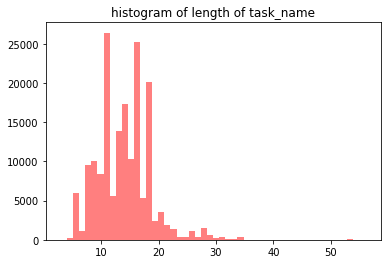

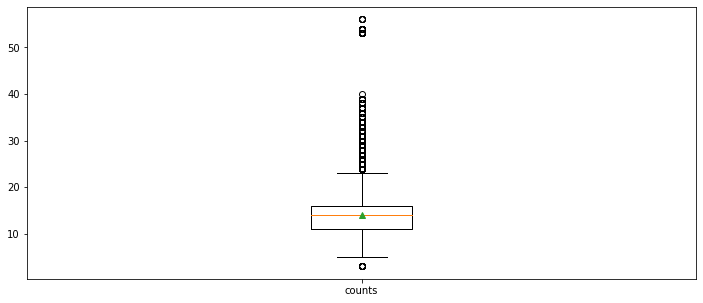

In [ ]:
length=train['사업명'].astype(str).apply(len)
plt.hist(length, bins=50, alpha=0.5, color='r', label='word')
plt.title('histogram of length of task_name')
plt.figure(figsize=(12, 5))
plt.boxplot(length, labels=['counts'], showmeans=True)
print('사업명 길이 최댓값: {}'.format(np.max(length)))
print('사업명 길이 최솟값: {}'.format(np.min(length)))
print('사업명 길이 평균값: {}'.format(np.mean(length)))
print('사업명 길이 중간값: {}'.format(np.median(length)))

과제명 길이 최댓값: 229
과제명 길이 최솟값: 2
과제명 길이 평균값: 35.84252225995961
과제명 길이 중간값: 34.0


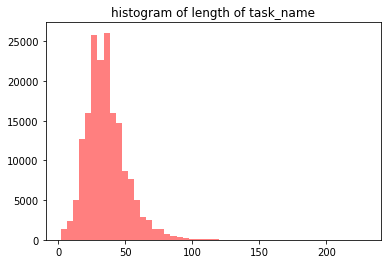

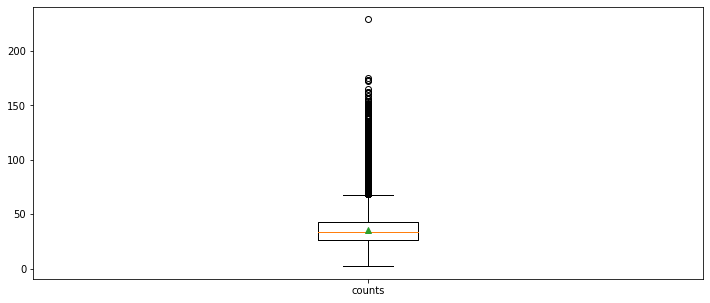

In [ ]:
length=train['과제명'].astype(str).apply(len)
plt.hist(length, bins=50, alpha=0.5, color='r', label='word')
plt.title('histogram of length of task_name')
plt.figure(figsize=(12, 5))
plt.boxplot(length, labels=['counts'], showmeans=True)
print('과제명 길이 최댓값: {}'.format(np.max(length)))
print('과제명 길이 최솟값: {}'.format(np.min(length)))
print('과제명 길이 평균값: {}'.format(np.mean(length)))
print('과제명 길이 중간값: {}'.format(np.median(length)))

요약문_연구목표 길이 최댓값: 3951
요약문_연구목표 길이 최솟값: 1
요약문_연구목표 길이 평균값: 318.1008066366807
요약문_연구목표 길이 중간값: 249.0


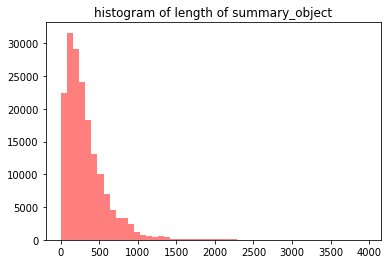

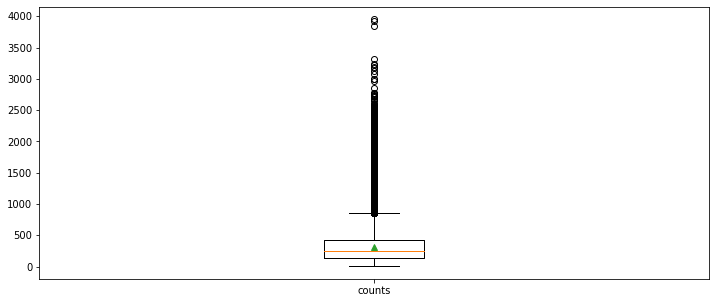

In [ ]:
length=train['요약문_연구목표'].astype(str).apply(len)
plt.hist(length, bins=50, alpha=0.5, color='r', label='word')
plt.title('histogram of length of summary_object')
plt.figure(figsize=(12, 5))
plt.boxplot(length, labels=['counts'], showmeans=True)
print('요약문_연구목표 길이 최댓값: {}'.format(np.max(length)))
print('요약문_연구목표 길이 최솟값: {}'.format(np.min(length)))
print('요약문_연구목표 길이 평균값: {}'.format(np.mean(length)))
print('요약문_연구목표 길이 중간값: {}'.format(np.median(length)))

요약문_연구내용 길이 최댓값: 3999
요약문_연구내용 길이 최솟값: 1
요약문_연구내용 길이 평균값: 699.2930282724435
요약문_연구내용 길이 중간값: 597.0


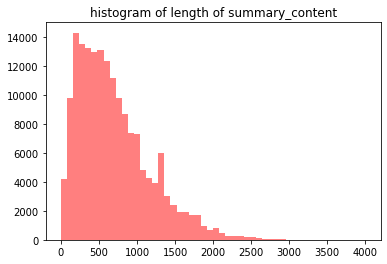

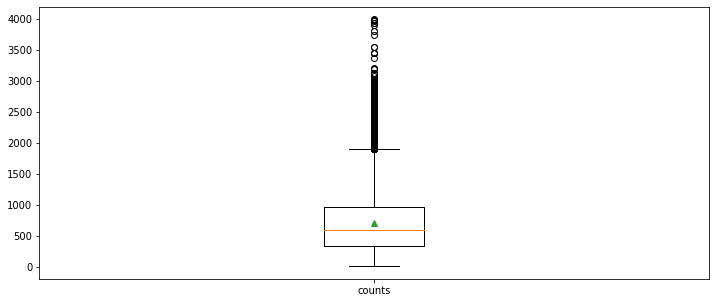

In [ ]:
length=train['요약문_연구내용'].astype(str).apply(len)
plt.hist(length, bins=50, alpha=0.5, color='r', label='word')
plt.title('histogram of length of summary_content')
plt.figure(figsize=(12, 5))
plt.boxplot(length, labels=['counts'], showmeans=True)
print('요약문_연구내용 길이 최댓값: {}'.format(np.max(length)))
print('요약문_연구내용 길이 최솟값: {}'.format(np.min(length)))
print('요약문_연구내용 길이 평균값: {}'.format(np.mean(length)))
print('요약문_연구내용 길이 중간값: {}'.format(np.median(length)))

요약문_한글키워드 길이 최댓값: 307
요약문_한글키워드 길이 최솟값: 1
요약문_한글키워드 길이 평균값: 33.606853543234806
요약문_한글키워드 길이 중간값: 31.0


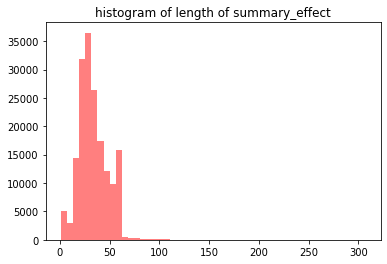

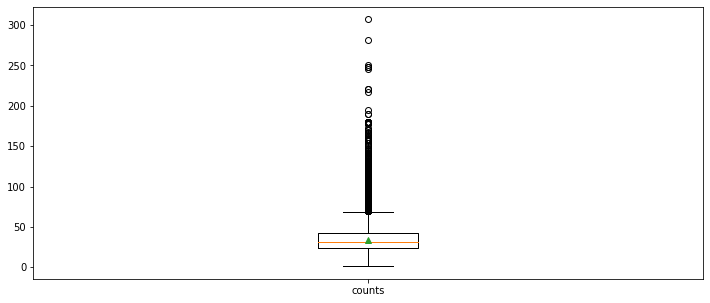

In [ ]:
length=train['요약문_한글키워드'].astype(str).apply(len)
plt.hist(length, bins=50, alpha=0.5, color='r', label='word')
plt.title('histogram of length of summary_effect')
plt.figure(figsize=(12, 5))
plt.boxplot(length, labels=['counts'], showmeans=True)
print('요약문_한글키워드 길이 최댓값: {}'.format(np.max(length)))
print('요약문_한글키워드 길이 최솟값: {}'.format(np.min(length)))
print('요약문_한글키워드 길이 평균값: {}'.format(np.mean(length)))
print('요약문_한글키워드 길이 중간값: {}'.format(np.median(length)))

# **3. 데이터 전처리**

#### [결측치 처리]

In [ ]:
# 결측치를 'NaN' 문자열로 처리
train = train.fillna("NaN")
test = test.fillna("NaN")

#### [파생변수 생성 (피처 통합)]

In [ ]:
# data = "사업명" + "과제명" + "요약문_한글키워드"
train["data"] = '사업명 : ' + train['사업명'] + ', 과제명 : ' + train['과제명'] + ', 키워드 : ' + train["요약문_한글키워드"]
test["data"] = '사업명 : ' + test['사업명'] + ', 과제명 : ' + test['과제명'] + ', 키워드 : ' + test["요약문_한글키워드"]

#### [label 값에 따른 train 값 분리]

In [ ]:
# label 값이 0 인 train 데이터
train_0 = train[train["label"] == 0]
# label 값이 0이 아닌 train 데이터
train_1 = train[train["label"] != 0]

#### [불균형 문제 처리]

1) 중복 데이터 제거

In [ ]:
# label 값이 0인 train 중복된 데이터 제거
train_0 = train_0.drop_duplicates(["data"])

2) Augmentation

- Augmentation 비율 구하기

In [ ]:
# 숫자 자릿수 구하는 함수
import math

def digit_length(n):
    return int(math.log10(n)) + 1 if n else 0

In [ ]:
label_ratio = pd.DataFrame(len(train_0) / train_1["label"].value_counts())
label_ratio["augmentation_multiples"] = label_ratio["label"].apply(lambda x: int(round(x, -1 * (digit_length(x)-1))/5))
label_ratio = label_ratio.reset_index().drop(["label"], axis=1)
label_ratio.head(3)

,index,augmentation_multiples
0,19,4
1,24,6
2,23,14


In [ ]:
train_1 = pd.merge(train_1, label_ratio, left_on="label", right_on="index", how="inner").drop(["index_y"], axis=1)
train_1.head(1)

,index_x,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label,data,augmentation_multiples
0,0,2016,농업기초기반연구,농촌진흥청,신규,농산물안전성연구,유전정보를 활용한 새로운 해충 분류군 동정기술 개발,○ 새로운 해충분류군의 동정기술 개발 및 유입확산 추적,(가) 외래 및 돌발해충의 발생조사 및 종 동정\n\n\n ○ 대상해충 : 최...,"○ 새로운 돌발 및 외래해충의 신속, 정확한 동정법 향상\n\n\n○ 돌발 및 외래...","뉴클레오티드 염기서열, 분자마커, 종 동정, 침샘, 전사체","nucleotide sequence, molecular marker, species...",24,"사업명 : 농업기초기반연구, 과제명 : 유전정보를 활용한 새로운 해충 분류군 동정기...",6


- 비율(augmentation_multiples)에 따라 EDA 실행

In [ ]:
# koeda 라이브러리 설치
#!pip install koeda
from koeda import EasyDataAugmentation


EDA = EasyDataAugmentation(
    morpheme_analyzer=None, alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, prob_rd=0.1
)

train_1_eda = []
label_eda = []
for d, l, m in zip(tqdm.tqdm(train_1["data"]), train_1["label"], train_1['augmentation_multiples']):
  train_1_eda.append(d)
  label_eda.append(l)
  for _ in range(m):
    train_1_eda.append(EDA(d))
    label_eda.append(l)

100%|██████████| 31733/31733 [3:19:17<00:00,  2.65it/s]


- EDA 결과 확인

In [ ]:
# EDA된 데이터 구조 확인
print(len(train_1_eda))
print()
print(len(label_eda))

1079205

1079205


In [ ]:
# 리스트를 시리즈로 변환
train_1_eda_series = pd.Series(train_1_eda)
label_eda_series = pd.Series(label_eda)

# 시리즈 -> 데이터프레임 (결합)
eda_df = pd.concat([train_1_eda_series, label_eda_series], axis=1)
eda_df.columns = ["data", "label"]
eda_df.head()

,data,label
0,"사업명 : 농업기초기반연구, 과제명 : 유전정보를 활용한 새로운 해충 분류군 동정기...",24
1,"산업명 : 농업기초기반연구, 과제명 : 유전정보를 활용한 새로운 해충 분류군 동정기...",24
2,"사업명 : 농업기초기반연구, 과제명 : 유전정보를 활용한 새로운 해충 분류군 동정기...",24
3,"사업명 : 농사기초기반연구, 과제명 : 유전정보를 활용한 새로운 해충 분류군 동정기...",24
4,"사업명 : 농업기초기반연구, 과제기술 : 유전정보를 활용한 새로운 해충 동정명 개발...",24


- EDA된 데이터 csv 파일로 저장

In [ ]:
eda_df.to_csv('/content/gdrive/My Drive/Colab Notebooks/data/eda5_data.csv', index = None, encoding='utf-8')

- EDA된 데이터 불러오기

In [ ]:
eda=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/eda5_data.csv')
eda.head()

,data,label
0,"사업명 : 농업기초기반연구, 과제명 : 유전정보를 활용한 새로운 해충 분류군 동정기...",24
1,"산업명 : 농업기초기반연구, 과제명 : 유전정보를 활용한 새로운 해충 분류군 동정기...",24
2,"사업명 : 농업기초기반연구, 과제명 : 유전정보를 활용한 새로운 해충 분류군 동정기...",24
3,"사업명 : 농사기초기반연구, 과제명 : 유전정보를 활용한 새로운 해충 분류군 동정기...",24
4,"사업명 : 농업기초기반연구, 과제기술 : 유전정보를 활용한 새로운 해충 동정명 개발...",24


- train 데이터 통합

In [ ]:
# label이 0인 train 데이터 + eda된 label이 0이 아닌 train 데이터
x_train = pd.concat([train_0["data"], eda["data"]])
y_train = pd.concat([train_0["label"], eda["label"]])

- 통합된 데이터 셔플

In [ ]:
df_train = pd.concat([x_train, y_train], axis=1)
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_train.head(50)

,data,label
0,"사업명 : 고부가가치식품기술개발, 과제명 : 동충하초기능성대체식품개발, 키워드 : ...",0
1,"사업명 개탄 : 미물 농업과학기반기술연구(R&D), 과제명 : 노지재배 배추에 재해...",24
2,"사업명 : 지역농업연구기반및전략작목육성(보조/경제), 과제명 : 유용미생물 활용 버...",0
3,"사업명 : 산학연협력기술개발(R&D), 과제명 : 고효율 방수식 수생태독성시험장치의...",27
4,"사업명 : 산림과학연구(R&D), 과제워드 :바이오인도네시아 이탄지의 목질계 바이오...",10
5,"사업명 : 원자력기술개발사업(R&D), 과제명 : 국내 고유 Level 3 PSA ...",1
6,"사업명 : BK21플러스사업(R&D), 과제명 : 광활성층 나노 모폴로지 제어 및 ...",5
7,"사업명 : 바이오산업핵심기술개발, 과제명 : 나노 분말화 기술을 이용하여 용법 및 ...",0
8,"사업명 : 신재생에너지기술개발, 과제 : 수문 매입 일체형 해양에너지 활용시스템 개...",41
9,"사업명 : 신품종지역적응연구, 과제명 통제 난제 : 영양체 유전자원 보존 사령 관리...",23


#### [텍스트 전처리]

- 데이터 분리

In [ ]:
x_train = df_train["data"]
y_train = df_train["label"]
x_test = test["data"]

In [ ]:
# Shape of dataset.
print(f'x_train shape: { x_train.shape }')
print(f'y_train shape: { y_train.shape }')
print(f'x_test shape:  { x_test.shape }' )

x_train shape: (1199845,)
y_train shape: (1199845,)
x_test shape:  (43576,)


- 텍스트 정제

In [ ]:
# text 정제 함수 생성 : 한글 이외의 문자는 전부 제거함.
def Preprocessing(text, tagger, remove_stopwords=False, stop_words=[]) :
    # 한글 정규식 정의(띄어쓰기, ㄱ ~ ㅣ, 가 ~ 힣)
    text = re.sub('[^ ㄱ-ㅣ가-힣:]+','',text)
    
    # 텍스트를 형태소로 분리후 각 단어로부터 어간을 추출.(stem=True)
    word_text = tagger.morphs(text)
    
    # 불용어 처리.
    if remove_stopwords :
        word_text = [ t for t in word_text if not t in stop_words ]
        
    return word_text

# 한글 불용어 사전 파일 이용.
with open('/content/gdrive/My Drive/Colab Notebooks/data/korean_stopwords.txt', encoding='utf-8') as fp :
    stop_words = fp.readlines()
    
# \n 제거.
stop_words = [ x.strip() for x in stop_words ]
# print(stop_words)
# print('-'*135)
# print()

# Mecab 이용.
tagger = Mecab()

# train, test 데이터를 정제한 텍스트를 담을 리스트 생성.
Clean_train_data = []
Clean_test_data  = []

# train dataset 정제 작업 시작.
for text in tqdm.tqdm(x_train) :
    try :
        Clean_train_data.append(Preprocessing(text, tagger, remove_stopwords=True, stop_words=stop_words))
    except :
        Clean_train_data.append([])

# test dataset 정제 작업 시작.
for text in tqdm.tqdm(x_test) :
    if type(text) == str :
        Clean_test_data.append(Preprocessing(text, tagger, remove_stopwords=True, stop_words=stop_words))
    else :
        Clean_test_data.append([])   
        
# 정제된 데이터의 수.
print(f'Train data : {len(Clean_train_data)}')
print(f'Test data  : {len(Clean_test_data)}')

100%|██████████| 43576/43576 [00:26<00:00, 1616.87it/s]

Train data : 1199845
Test data  : 43576


- 인데스 벡터 전환 및 패딩 처리

In [ ]:
# 우선 특별한 옵션을 지정하지 않고 진행.
token = Tokenizer()

# fit_on_texts() : 입력으로 들어온 텍스트에서 단어의 빈도수가 높은 순으로 낮은 숫자부터 인덱스 부여, 단어 집합 생성.
token.fit_on_texts(Clean_train_data)

# 단어 사전을 통해 문장의 각 단어를 숫자(시퀀스 형태)로 변환. : 인덱스로만 채워진 새로운 배열을 생성한다는 의미.
Train_squences = token.texts_to_sequences(Clean_train_data)
Test_squences  = token.texts_to_sequences(Clean_test_data)

# 한 문장의 최대 단어 수를 가져옴.
max_cnt = 0
for c in Train_squences :
    # 현재 문장의 글자수.
    cnt = len(c)
    # 현재 문장의 글자수가 이전 최대 수치보다 많으면 덮어쓰기.
    if max_cnt < cnt :
        max_cnt = cnt
print(f'최대 단어의 개수 : {max_cnt}')

# Padding 처리 : 서로 길이가 다른 리스트의 개수를 max_cnt로 맞춰줌.
# 끝 부분으로 적용. ==> 즉 max_cnt 길이의 리스트로 동일하게 맞춰주기 위해 부족한 부분으로 뒤에서 부터 0으로 채우는 작업을 의미.
padded_train = pad_sequences(Train_squences, max_cnt, padding='post')
padded_test  = pad_sequences(Test_squences, max_cnt, padding='post')

# One-hot-encoding.
# 주의 : 맨 앞에 0이 추가됨.
voca_size = len(token.word_index) + 1
# train_x = to_categorical(Train_squences, num_classes = voca_size)
# test_x  = to_categorical(Test_squences, num_classes = voca_size)
print("voca_size :", voca_size)

최대 단어의 개수 : 112
voca_size : 66810


- 추후 재사용 가능하도록 npy로 전환 및 저장

In [ ]:
import json

DATA_IN_PATH='/content/gdrive/My Drive/Colab Notebooks/train_data/eda_{112}-{66810}/'  # eda_{max_cnt}-{voca_size}
TRAIN_INPUT_DATA = 'train_inputs.npy'
LABEL_INPUT_DATA = 'label_inputs.npy'
TEST_INPUT_DATA = 'test_input.npy'

import os
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)
    
np.save(open(DATA_IN_PATH+TRAIN_INPUT_DATA, 'wb'), padded_train)
np.save(open(DATA_IN_PATH+LABEL_INPUT_DATA, 'wb'), y_train)
np.save(open(DATA_IN_PATH+TEST_INPUT_DATA, 'wb'), padded_test)

data_configs={}
data_configs['vocab']=token.word_index
data_configs['vocab_size'] = voca_size
json.dump(data_configs, open(DATA_IN_PATH+'data_configs.json', 'w'), ensure_ascii=False)

In [ ]:
# # eda2
# max_cnt = 59
# voca_size = 47613

# # eda5
# max_cnt = 58
# voca_size = 41130

# # eda10
# max_cnt = 58
# voca_size = 37352

# base
max_cnt = 55
voca_size = 27533

# **4. 모델링**

- 전처리된 데이터 불러오기

In [ ]:
padded_train = np.load('/content/gdrive/My Drive/Colab Notebooks/train_data/base_weight/train_inputs.npy')
y_train = np.load('/content/gdrive/My Drive/Colab Notebooks/train_data/base_weight/label_inputs.npy')
padded_test = np.load('/content/gdrive/My Drive/Colab Notebooks/train_data/base_weight/test_input.npy')

- weight 구하기

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
weight = compute_class_weight(class_weight = "balanced", classes=np.unique(y_train), y = y_train)
class_weight = {}
for i in set(y_train):
  class_weight[i] = weight[i]
class_weight

{0: 0.026577756986374143,
 1: 3.0049305244285076,
 2: 13.77897233201581,
 3: 26.49802371541502,
 4: 66.47749809305873,
 5: 2.2315767911097453,
 6: 48.57971014492754,
 7: 33.53289726818007,
 8: 11.17763242272669,
 9: 35.7473338802297,
 10: 5.758689044535483,
 11: 18.94608695652174,
 12: 14.138870863075924,
 13: 6.589943289224952,
 14: 2.266278344081548,
 15: 22.964953886693017,
 16: 7.48857191957381,
 17: 24.605307735742517,
 18: 2.444656381486676,
 19: 0.7673587264690862,
 20: 3.578108962515909,
 21: 7.639551192145863,
 22: 25.602820211515862,
 23: 2.0593572778827975,
 24: 1.076482213438735,
 25: 4.678046162104133,
 26: 11.991194276279582,
 27: 6.11164095371669,
 28: 8.439236951680062,
 29: 3.686009135510066,
 30: 16.193236714975846,
 31: 4.109780250872395,
 32: 14.57391304347826,
 33: 7.109225874867445,
 34: 7.2451575359547755,
 35: 13.021365605856865,
 36: 3.5747333880229695,
 37: 14.2451781627983,
 38: 14.462661798871556,
 39: 18.758501937150236,
 40: 8.592329685497388,
 41: 56.5554

#### [기본 모델링]

- SparseCategoricalCroossentropy : y_train값이 label 값(클래스) 그대로인 경우
- CategoricalCrossentropy : y_train값은 원-핫-인코딩 시킨 경우
  > label_smoothing을 적용하므로 CategoricalCrossentropy 사용

In [ ]:
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy

In [ ]:
y_train = to_categorical(y_train, num_classes=46)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(voca_size, 32, input_length=max_cnt),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(46, activation='softmax')
])

# compile model
model.compile(loss=CategoricalCrossentropy(label_smoothing=0.3),
              optimizer='adam',
              metrics=['accuracy'])

num_epochs = 20
history = model.fit(padded_train, y_train, epochs=num_epochs, verbose=2, validation_split=0.2, class_weight=class_weight)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/20
4358/4358 - 55s - loss: 2.2624 - accuracy: 0.8252 - val_loss: 2.1213 - val_accuracy: 0.8368
Epoch 2/20
4358/4358 - 58s - loss: 2.1347 - accuracy: 0.8443 - val_loss: 2.0690 - val_accuracy: 0.8496
Epoch 3/20
4358/4358 - 56s - loss: 2.0782 - accuracy: 0.8609 - val_loss: 2.0315 - val_accuracy: 0.8638
Epoch 4/20
4358/4358 - 56s - loss: 2.0378 - accuracy: 0.8731 - val_loss: 2.0089 - val_accuracy: 0.8698
Epoch 5/20
4358/4358 - 56s - loss: 2.0099 - accuracy: 0.8833 - val_loss: 1.9888 - val_accuracy: 0.8763
Epoch 6/20
4358/4358 - 58s - loss: 1.9863 - accuracy: 0.8909 - val_loss: 1.9758 - val_accuracy: 0.8828
Epoch 7/20
4358/4358 - 60s - loss: 1.9637 - accuracy: 0.8986 - val_loss: 1.9692 - val_accuracy: 0.8849
Epoch 8/20
4358/4358 - 57s - loss: 1.9499 - accuracy: 0.9046 - val_loss: 1.9632 - val_accuracy: 0.8946
Epoch 9/20
4358/4358 - 59s - loss: 1.9

In [ ]:
# 모델 평가
model.evaluate(padded_train, y_train)[1] # 0.9529270529747009-40

5447/5447 [==============================] - 9s 2ms/step - loss: 1.8341 - accuracy: 0.9552


0.9551989436149597

In [ ]:
# 모델 저장
model.save('/content/gdrive/My Drive/Colab Notebooks/models/base/base_weight_label_smoothing_45epochs_model.h5')

#### [모델링 - earlystop]

In [ ]:
# Modeling.

# 학습 모델을 구성.
model = Sequential()

# word embedding : 데이터 공간의 효율성을 위해 주어진 배열을 정해진 길이로 압축하는 작업.
# keras의 Embedding 함수는 오차역전파 방식으로 각 단어 간의 최적의 유사도를 계산.
model.add(Embedding(voca_size, 32, input_length = max_cnt))

# 임시 데이터에 대한 글로벌 평균 풀링 작업.?
model.add(GlobalAveragePooling1D())
model.add(Dense(128, activation = 'relu'))

# 다변량 라베링에 대한 결과이므로 Softmax 통과. 0, 1(0이 아닌)에 대한 이진 결과로 보고자할 시 Sigmoid로 통과.
model.add(Dense(46, activation = 'softmax'))
# model.summary()

# 컴파일.
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델 저장 폴더 설정.
model_dir = '/content/gdrive/My Drive/Colab Notebooks/models/eda_f1_f4/'

# 해당 폴더가 존재하지 않으면 생성.
if not os.path.isdir(model_dir) :                                                           
    os.mkdir(model_dir)
    
# Callback 조건 설정.
model_path = model_dir+'{epoch}-{val_loss}.hdf5'

# Validation Loss를 기준으로 조건 판단.
callback1 = ModelCheckpoint(filepath = model_path, monitor = 'val_loss', verbose = 1, save_best_only = True)

# 이전 가장 좋은 결과 대비 10회 이상 후에도 향상 되는 결과가 나오지 않을시 학습 중단.
callback2 = EarlyStopping(monitor = 'val_loss', patience=10)

# 모델 학습.
history = model.fit(padded_train, y_train, validation_split = 0.2, epochs = 30, verbose = 2, callbacks = [callback1, callback2])

# 모델 학습(+ class_weight)
#history = model.fit(padded_train, y_train, validation_split = 0.2, epochs = 30, verbose = 0, callbacks = [callback1, callback2], class_weight=class_weight)

Epoch 1/30
28460/28460 - 431s - loss: 0.6874 - accuracy: 0.8159 - val_loss: 0.2842 - val_accuracy: 0.9184

Epoch 00001: val_loss improved from inf to 0.28420, saving model to /content/gdrive/My Drive/Colab Notebooks/models/eda_f1_f4/1-0.284201979637146.hdf5
Epoch 2/30
28460/28460 - 406s - loss: 0.2223 - accuracy: 0.9340 - val_loss: 0.1990 - val_accuracy: 0.9404

Epoch 00002: val_loss improved from 0.28420 to 0.19900, saving model to /content/gdrive/My Drive/Colab Notebooks/models/eda_f1_f4/2-0.19899918138980865.hdf5
Epoch 3/30
28460/28460 - 395s - loss: 0.1656 - accuracy: 0.9492 - val_loss: 0.1693 - val_accuracy: 0.9480

Epoch 00003: val_loss improved from 0.19900 to 0.16932, saving model to /content/gdrive/My Drive/Colab Notebooks/models/eda_f1_f4/3-0.16931679844856262.hdf5
Epoch 4/30
28460/28460 - 381s - loss: 0.1364 - accuracy: 0.9573 - val_loss: 0.1530 - val_accuracy: 0.9521

Epoch 00004: val_loss improved from 0.16932 to 0.15304, saving model to /content/gdrive/My Drive/Colab Note

#### [모델링 - LSTM]

In [ ]:
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import Bidirectional

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(voca_size, 32, input_length=max_cnt),
    tf.keras.layers.Bidirectional(LSTM(20, return_sequences = False)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(46, activation='softmax')
])

# compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

num_epochs = 30
history = model.fit(padded_train, y_train, epochs=num_epochs, verbose=2, validation_split=0.2)

Epoch 1/30
28460/28460 - 529s - loss: 0.8067 - accuracy: 0.7810 - val_loss: 0.3396 - val_accuracy: 0.9068
Epoch 2/30
28460/28460 - 530s - loss: 0.3471 - accuracy: 0.9097 - val_loss: 0.2495 - val_accuracy: 0.9299
Epoch 3/30
28460/28460 - 524s - loss: 0.2654 - accuracy: 0.9305 - val_loss: 0.2103 - val_accuracy: 0.9413
Epoch 4/30
28460/28460 - 521s - loss: 0.2256 - accuracy: 0.9408 - val_loss: 0.1940 - val_accuracy: 0.9457
Epoch 5/30
28460/28460 - 522s - loss: 0.2017 - accuracy: 0.9473 - val_loss: 0.1887 - val_accuracy: 0.9478
Epoch 6/30
28460/28460 - 521s - loss: 0.1868 - accuracy: 0.9511 - val_loss: 0.1885 - val_accuracy: 0.9499
Epoch 7/30
28460/28460 - 524s - loss: 0.1761 - accuracy: 0.9539 - val_loss: 0.1935 - val_accuracy: 0.9494
Epoch 8/30
28460/28460 - 517s - loss: 0.1678 - accuracy: 0.9559 - val_loss: 0.1817 - val_accuracy: 0.9516
Epoch 9/30
28460/28460 - 522s - loss: 0.1629 - accuracy: 0.9571 - val_loss: 0.1759 - val_accuracy: 0.9529
Epoch 10/30


In [ ]:
# 모델 평가
model.evaluate(padded_train, y_train)[1]

5447/5447 [==============================] - 11s 2ms/step - loss: 0.7687 - accuracy: 0.9032


0.9031519889831543

In [ ]:
# 모델 저장
model.save('/content/gdrive/My Drive/Colab Notebooks/models/base/base_weight_lstm_200epochs_model.h5')

# **5. 예측 후 제출하기**

In [ ]:
# 성능 최적의 모델 로딩. 
# 모델 폴더의 가장 마지막에 위치한 파일명 입력.
best_model = load_model('/content/gdrive/My Drive/Colab Notebooks/models/base/eda5_f1_f4_label_smoothing_45epochs_model.h5')
best_model.evaluate(padded_train, y_train)[1]

35575/35575 [==============================] - 121s 3ms/step - loss: 1.8731 - accuracy: 0.9566


0.9565738439559937

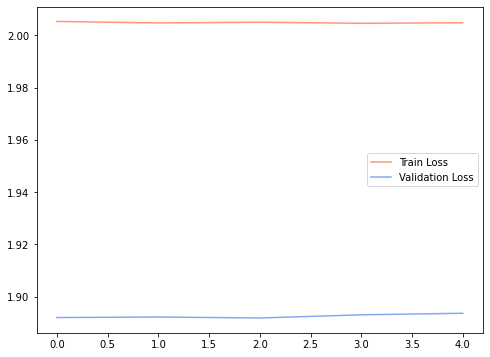

In [ ]:
# Train Loss
y_loss = history.history['loss']
# Validation Loss
y_vloss = history.history['val_loss']

plt.figure(figsize=(8,6))
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_loss,  label='Train Loss', c='coral', alpha=.8)
plt.plot(x_len, y_vloss,  label='Validation Loss', c='cornflowerblue', alpha=.8)
plt.legend()
plt.show()

In [ ]:
pred = best_model.predict(padded_test)
pred = tf.argmax(pred, axis = 1)

df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/sample_submission.csv')
df['label'] = pred
df.to_csv('/content/gdrive/My Drive/Colab Notebooks/data/base_label_smoothing_45epochs_model.csv', index=False)

In [ ]:
pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/base_label_smoothing_45epochs_model.csv')

,index,label
0,174304,0
1,174305,0
2,174306,0
3,174307,0
4,174308,0
...,...,...
43571,217875,0
43572,217876,0
43573,217877,2
43574,217878,0
